# Epoch Length Analysis

In [1]:
from content_opener import open_all_contents, open_contents, Results, Settings, Values, Labels
from typing import List
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def plot_full_epoch(dataset, net, optimizer, cycle, decay, lr):
    
    settings_list = []
    settings_list.append(Settings(dataset, net, optimizer, cycle, decay, lr, 'batch-size=32, epochs=500'))
    settings_list.append(Settings(dataset, net, optimizer, cycle, decay, lr, 'batch-size=128, epochs=500'))
    results = open_all_contents(settings_list)

    plt.plot(results[0].values.val_accuracy, label='batch size 32')
    plt.plot(results[1].values.val_accuracy, label='batch size 128')

    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    labels = results[0].get_labels()
    lr = labels.initial_lr

    plt.title(labels.dataset + ', '
              + labels.net + ', '
              + labels.optimizer + ', '
              + labels.decay + ', '
              + labels.cycle + ', '
              + 'lr = ' + lr)
    

def compare_full_with_partial_epochs(dataset, net, optimizer, cycle, decay, lr, batch_size,
                                    first_x_epochs=100, offset_down=0.05, offset_up=0.01):

    settings = Settings(dataset, net, optimizer, cycle, decay, lr, batch_size +', epochs=500')
    results = open_contents(settings)

    plt.plot(results.values.val_accuracy, label='batch size 32')

    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.ylim(min(max(results.values.val_accuracy), max(results.values.val_accuracy[:101])) - offset_down,
             max(max(results.values.val_accuracy), max(results.values.val_accuracy[:101])) + offset_up)
    labels = results.get_labels()
    lr = labels.initial_lr

    plt.vlines(np.argmax(np.array(results.values.val_accuracy)), 0, 1, 'r')
    plt.hlines(max(results.values.val_accuracy), 0, 501, 'r',
               label=f'max accuracy @{str(max(results.values.val_accuracy))}')
    plt.vlines(np.argmax(np.array(results.values.val_accuracy[:first_x_epochs + 1])), 0, 1, 'm')
    plt.hlines(max(results.values.val_accuracy[:first_x_epochs + 1]), 0, 501, 'm',
               label=f'max accuracy of first {first_x_epochs} @{str(max(results.values.val_accuracy[:101]))}')


    plt.legend()
    plt.title(labels.dataset + ', '
              + labels.net + ', '
              + labels.optimizer + ', '
              + labels.decay + ', '
              + labels.cycle + ', '
              + 'lr = ' + lr)

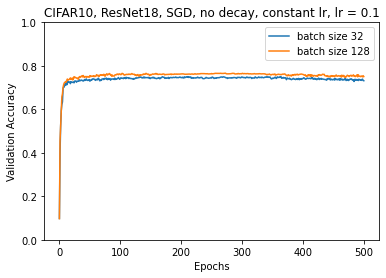

In [44]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.1'

plot_full_epoch(dataset, net, optimizer, cycle, decay, lr)

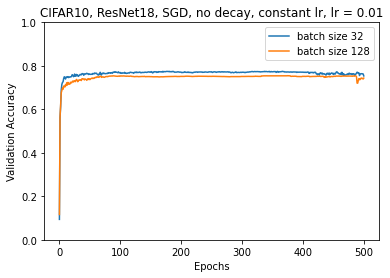

In [45]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.01'

plot_full_epoch(dataset, net, optimizer, cycle, decay, lr)

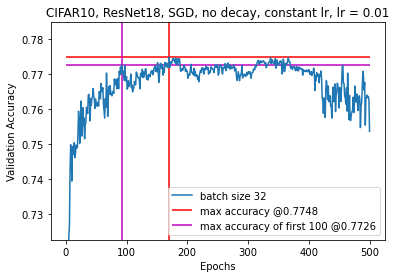

In [46]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.01'
batch_size = 'batch-size=32'

compare_full_with_partial_epochs(dataset, net, optimizer, cycle, decay, lr, batch_size)

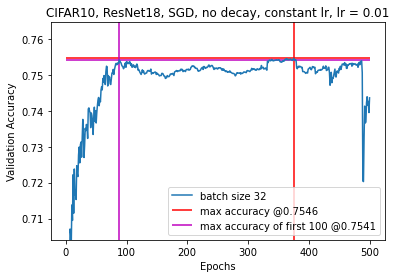

In [47]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.01'
batch_size = 'batch-size=128'

compare_full_with_partial_epochs(dataset, net, optimizer, cycle, decay, lr, batch_size)

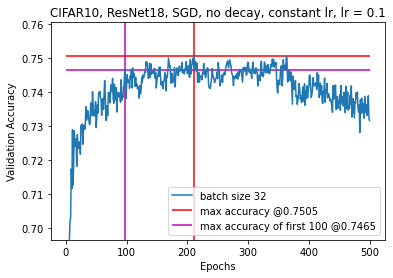

In [48]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.1'
batch_size = 'batch-size=32'

compare_full_with_partial_epochs(dataset, net, optimizer, cycle, decay, lr, batch_size)

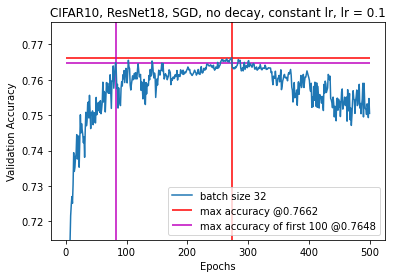

In [49]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.1'
batch_size = 'batch-size=128'

compare_full_with_partial_epochs(dataset, net, optimizer, cycle, decay, lr, batch_size)

## Conclusion